# Tweet Sentiment Analysis

## Collection of 100,000 tweets for sentiment analysis

In [1]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head()

,text
0,"seven, illicit affairs and exile i think ... i..."
1,@tera_cory Heart breaking. Prayers for the fam...
2,@Feiiiv @FaTal_Skream yea but i dont think the...
3,@MoneyBanklocks Yea i think so too I need to g...
4,RT @chuuzus: BREAKING: Regina Hall and Anna Fa...


## Text preprocessing

Tweets are cleaned and normalized for better analysis.

In [2]:
import contractions
import inflect
import nltk
import re
import preprocessor
import unicodedata

def clean_text(text):
    text = preprocessor.clean(text)
    text = re.sub(r'RT', '', text)
    text = re.sub(r'\w+:\s', '', text)
    text = re.sub(r':\s', '', text)
    
    text = contractions.fix(text)
    
    return normalize(text)

def normalize(text):
    words = nltk.word_tokenize(text)
    new_text = ''
    
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        
        if new_word != '':            
            if new_word.isdigit():
                new_word = inflect.engine().number_to_words(new_word)
                
            new_word = unicodedata.normalize('NFKD', new_word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_word = new_word.lower()
            
            new_text += new_word + ' '
    
    return new_text

df['clean_text'] = df['text'].apply(clean_text)
df.head()

,text,clean_text
0,"seven, illicit affairs and exile i think ... i...",seven illicit affairs and exile i think its so...
1,@tera_cory Heart breaking. Prayers for the fam...,heart breaking prayers for the family that the...
2,@Feiiiv @FaTal_Skream yea but i dont think the...,yea but i do not think they would like that ye...
3,@MoneyBanklocks Yea i think so too I need to g...,yea i think so too i need to get that figured ...
4,RT @chuuzus: BREAKING: Regina Hall and Anna Fa...,regina hall and anna faris will reprise their ...


Lemmatization of verbs to create a word cloud.

In [3]:
def lemmatize(text):
    words = nltk.word_tokenize(text)
    new_text = ''
    
    for word in words:
        new_word = nltk.WordNetLemmatizer().lemmatize(word, pos = 'v')
        new_text += new_word + ' '
    
    return new_text

df['lemmatize'] = df['clean_text'].apply(lemmatize)
df.head()

,text,clean_text,lemmatize
0,"seven, illicit affairs and exile i think ... i...",seven illicit affairs and exile i think its so...,seven illicit affairs and exile i think its so...
1,@tera_cory Heart breaking. Prayers for the fam...,heart breaking prayers for the family that the...,heart break prayers for the family that the lo...
2,@Feiiiv @FaTal_Skream yea but i dont think the...,yea but i do not think they would like that ye...,yea but i do not think they would like that ye...
3,@MoneyBanklocks Yea i think so too I need to g...,yea i think so too i need to get that figured ...,yea i think so too i need to get that figure o...
4,RT @chuuzus: BREAKING: Regina Hall and Anna Fa...,regina hall and anna faris will reprise their ...,regina hall and anna faris will reprise their ...


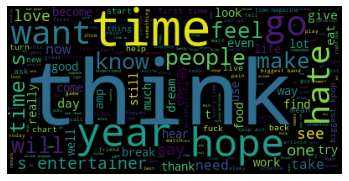

In [4]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud

text = ' '.join(df['lemmatize'])

wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Sentiment Analysis

In [5]:
from textblob import TextBlob

def get_polarity(text):
    analysis = TextBlob(text)
    
    return analysis.polarity

df['polarity'] = df['clean_text'].apply(get_polarity)
df.head()

,text,clean_text,lemmatize,polarity
0,"seven, illicit affairs and exile i think ... i...",seven illicit affairs and exile i think its so...,seven illicit affairs and exile i think its so...,0.038889
1,@tera_cory Heart breaking. Prayers for the fam...,heart breaking prayers for the family that the...,heart break prayers for the family that the lo...,0.000000
2,@Feiiiv @FaTal_Skream yea but i dont think the...,yea but i do not think they would like that ye...,yea but i do not think they would like that ye...,0.000000
3,@MoneyBanklocks Yea i think so too I need to g...,yea i think so too i need to get that figured ...,yea i think so too i need to get that figure o...,0.000000
4,RT @chuuzus: BREAKING: Regina Hall and Anna Fa...,regina hall and anna faris will reprise their ...,regina hall and anna faris will reprise their ...,0.000000


In [6]:
def get_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    
    if polarity == 0:
        return 'neutral'
    
    return 'negative'

df['sentiment'] = df['polarity'].apply(get_sentiment)
df.head()

,text,clean_text,lemmatize,polarity,sentiment
0,"seven, illicit affairs and exile i think ... i...",seven illicit affairs and exile i think its so...,seven illicit affairs and exile i think its so...,0.038889,positive
1,@tera_cory Heart breaking. Prayers for the fam...,heart breaking prayers for the family that the...,heart break prayers for the family that the lo...,0.000000,neutral
2,@Feiiiv @FaTal_Skream yea but i dont think the...,yea but i do not think they would like that ye...,yea but i do not think they would like that ye...,0.000000,neutral
3,@MoneyBanklocks Yea i think so too I need to g...,yea i think so too i need to get that figured ...,yea i think so too i need to get that figure o...,0.000000,neutral
4,RT @chuuzus: BREAKING: Regina Hall and Anna Fa...,regina hall and anna faris will reprise their ...,regina hall and anna faris will reprise their ...,0.000000,neutral


Percentage of tweets according to their sentiment.

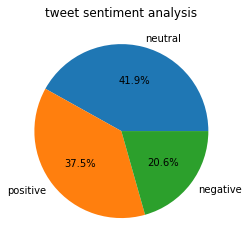

In [7]:
plt.pie(df['sentiment'].value_counts(), labels = ['neutral', 'positive', 'negative'], autopct = '%1.1f%%')
plt.title('tweet sentiment analysis')
plt.show()

## Tweets with neutral sentiment

In [8]:
df[df['sentiment'] == 'neutral'][['clean_text', 'lemmatize']].head()

,clean_text,lemmatize
1,heart breaking prayers for the family that the...,heart break prayers for the family that the lo...
2,yea but i do not think they would like that ye...,yea but i do not think they would like that ye...
3,yea i think so too i need to get that figured ...,yea i think so too i need to get that figure o...
4,regina hall and anna faris will reprise their ...,regina hall and anna faris will reprise their ...
5,not going to sugarcoat if we actaully used the...,not go to sugarcoat if we actaully use the ene...


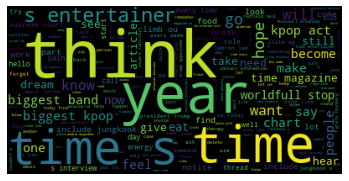

In [9]:
text = ' '.join(df[df['sentiment'] == 'neutral']['lemmatize'])

wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Tweets with positive sentiment

In [10]:
df[df['sentiment'] == 'positive'][['clean_text', 'lemmatize']].head()

,clean_text,lemmatize
0,seven illicit affairs and exile i think its so...,seven illicit affairs and exile i think its so...
6,more than onemore than one,more than onemore than one
9,how he asked to meet in i have really been enj...,how he ask to meet in i have really be enjoy o...
11,anyway in theory i am very down for this new s...,anyway in theory i be very down for this new s...
12,bonjour you can read it three breaking a detai...,bonjour you can read it three break a detail i...


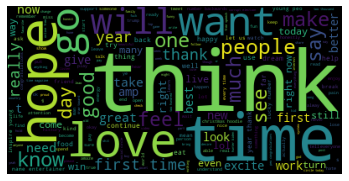

In [11]:
text = ' '.join(df[df['sentiment'] == 'positive']['lemmatize'])

wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Tweets with negative sentiment

In [12]:
df[df['sentiment'] == 'negative'][['clean_text', 'lemmatize']].head()

,clean_text,lemmatize
17,being sleepy at work is the worst feeling bein...,be sleepy at work be the worst feel be sleepy ...
20,tw violence abuse blood bruises cuts i hate do...,tw violence abuse blood bruise cut i hate do t...
22,lmfaooo you hate it lmfaooo you hate it,lmfaooo you hate it lmfaooo you hate it
29,irrelevant attention seeker irrelevant attenti...,irrelevant attention seeker irrelevant attenti...
33,your idols smoke drink have sex cuss say stupi...,your idols smoke drink have sex cuss say stupi...


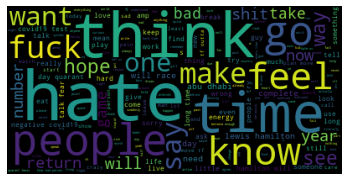

In [13]:
text = ' '.join(df[df['sentiment'] == 'negative']['lemmatize'])

wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()